In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airline-passenger-satisfaction/train.csv
/kaggle/input/airline-passenger-satisfaction/test.csv


In [2]:
import matplotlib.pyplot as plt
import sklearn 
import seaborn as sns

In [3]:
train_1 = pd.read_csv("/kaggle/input/airline-passenger-satisfaction/train.csv")

In [4]:
train_1.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
train_1.tail()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


In [6]:
test_1 = pd.read_csv("/kaggle/input/airline-passenger-satisfaction/test.csv")

In [7]:
test_1.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [8]:
train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [9]:
train_1["Customer Type"].value_counts()

Loyal Customer       84923
disloyal Customer    18981
Name: Customer Type, dtype: int64

In [10]:
train_1["Type of Travel"].value_counts()

Business travel    71655
Personal Travel    32249
Name: Type of Travel, dtype: int64

In [11]:
train_1["Class"].value_counts()

Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64

In [12]:
train_1["satisfaction"].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

In [13]:
train_1.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


<AxesSubplot:xlabel='Inflight wifi service', ylabel='count'>

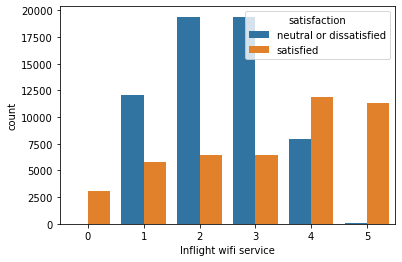

In [14]:
sns.countplot(data=train_1, x="Inflight wifi service", hue="satisfaction")

<AxesSubplot:xlabel='Departure/Arrival time convenient', ylabel='count'>

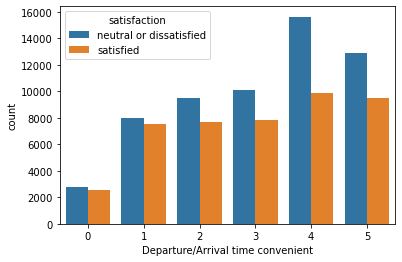

In [15]:
sns.countplot(data=train_1, x="Departure/Arrival time convenient", hue="satisfaction")

<AxesSubplot:xlabel='Ease of Online booking', ylabel='count'>

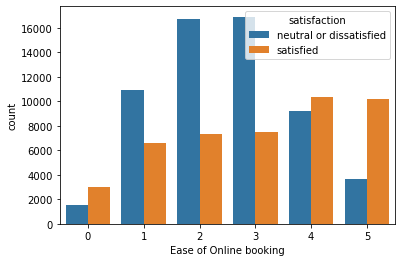

In [16]:
sns.countplot(data=train_1, x="Ease of Online booking", hue="satisfaction")

<AxesSubplot:xlabel='Gate location', ylabel='count'>

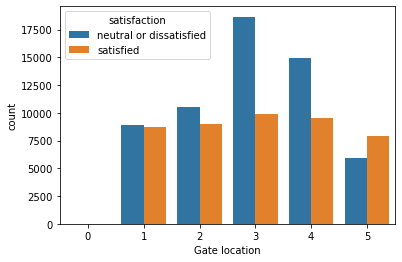

In [17]:
sns.countplot(data=train_1, x="Gate location", hue="satisfaction")

<AxesSubplot:xlabel='Flight Distance', ylabel='Count'>

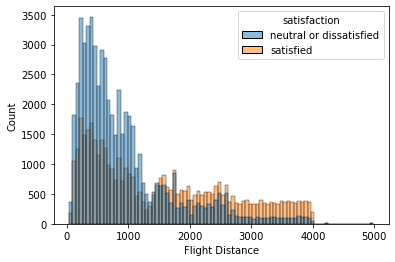

In [18]:
sns.histplot(data=train_1, x="Flight Distance", hue="satisfaction")

In [19]:
len(train_1[train_1["Departure Delay in Minutes"]>1000])

3

In [20]:
len(train_1[train_1["Arrival Delay in Minutes"]>1000])

3

In [21]:
len(train_1[train_1["Departure Delay in Minutes"]>100])

3507

In [22]:
len(train_1[train_1["Arrival Delay in Minutes"]>100])

3599

In [23]:
train_1.pop(train_1.columns[0])

0              0
1              1
2              2
3              3
4              4
           ...  
103899    103899
103900    103900
103901    103901
103902    103902
103903    103903
Name: Unnamed: 0, Length: 103904, dtype: int64

In [24]:
train_1.pop(train_1.columns[0])

0          70172
1           5047
2         110028
3          24026
4         119299
           ...  
103899     94171
103900     73097
103901     68825
103902     54173
103903     62567
Name: id, Length: 103904, dtype: int64

<AxesSubplot:>

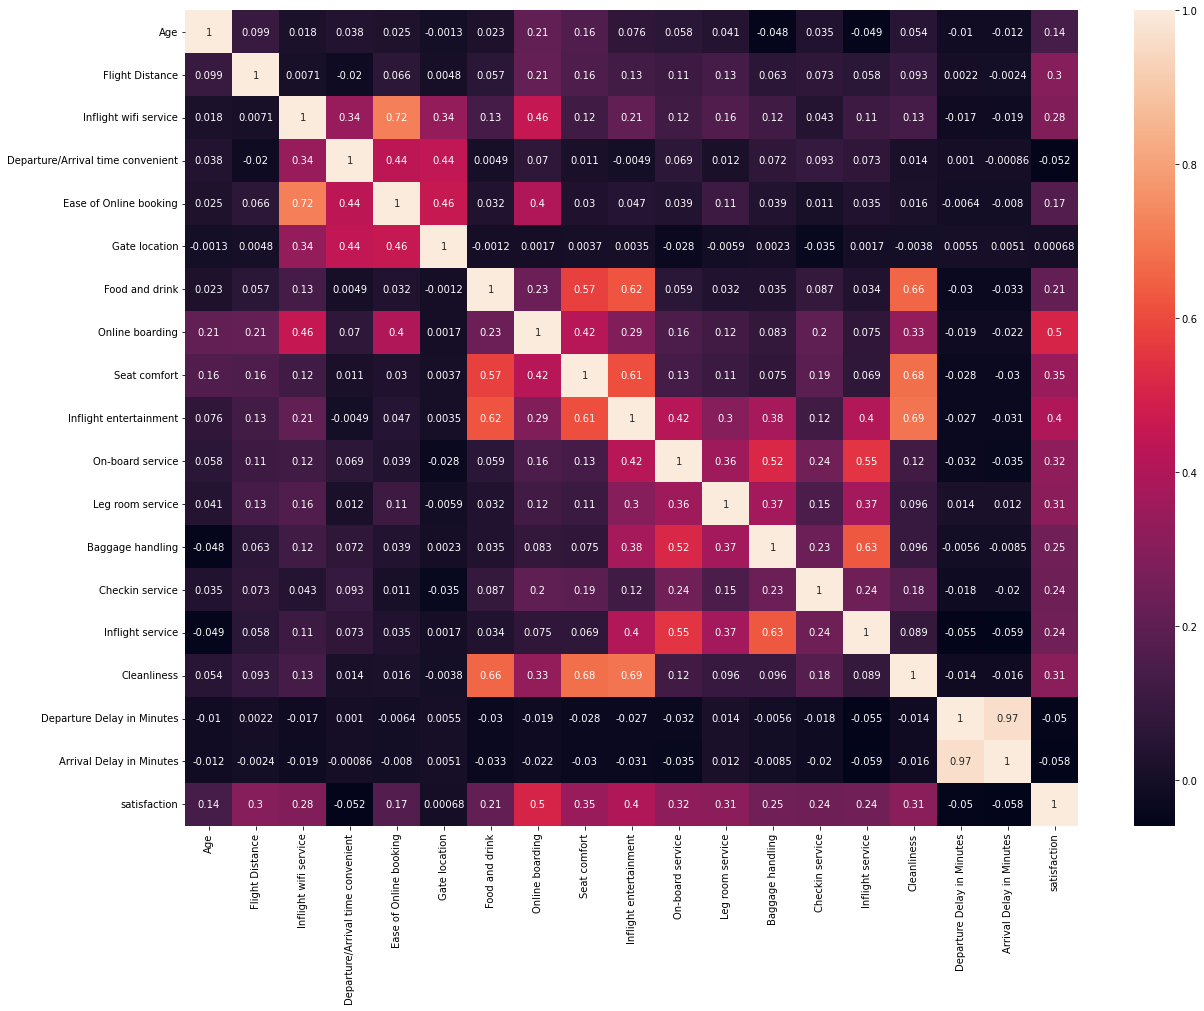

In [25]:
train_satisfaction = train_1.copy()
train_satisfaction['satisfaction'] = train_satisfaction['satisfaction'].replace(['neutral or dissatisfied', 'satisfied'], [0, 1])

corr = train_satisfaction.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True)

In [26]:
from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features = discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

X = train_1.copy()
y = X.pop("satisfaction")
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()
discrete_features = X.dtypes == int
X["Arrival Delay in Minutes"].fillna(0, inplace=True)
mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores

Online boarding                      0.210858
Inflight wifi service                0.161702
Class                                0.133508
Type of Travel                       0.113635
Inflight entertainment               0.093717
Flight Distance                      0.081411
Seat comfort                         0.078879
Leg room service                     0.060730
On-board service                     0.057203
Cleanliness                          0.051827
Ease of Online booking               0.050834
Age                                  0.046166
Baggage handling                     0.042633
Inflight service                     0.040982
Checkin service                      0.031930
Food and drink                       0.026221
Customer Type                        0.018590
Gate location                        0.012023
Arrival Delay in Minutes             0.010338
Departure Delay in Minutes           0.005331
Departure/Arrival time convenient    0.002173
Gender                            

<AxesSubplot:xlabel='Online boarding', ylabel='count'>

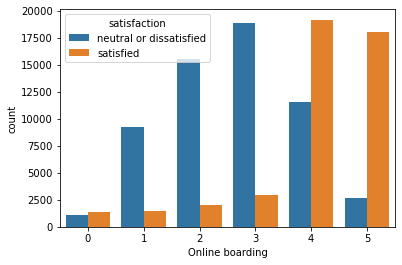

In [27]:
sns.countplot(x="Online boarding", hue="satisfaction", data=train_1)

<AxesSubplot:xlabel='Class', ylabel='count'>

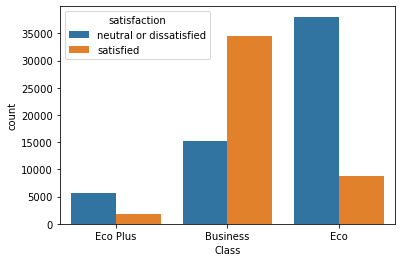

In [28]:
sns.countplot(x="Class", hue="satisfaction", data=train_1)

<AxesSubplot:xlabel='Type of Travel', ylabel='count'>

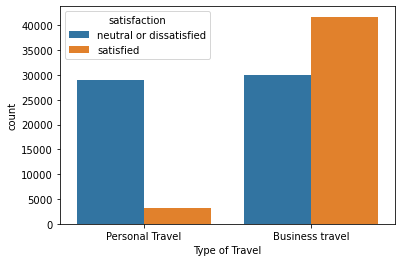

In [29]:
sns.countplot(x="Type of Travel", hue="satisfaction", data=train_1)

<AxesSubplot:xlabel='Inflight entertainment', ylabel='count'>

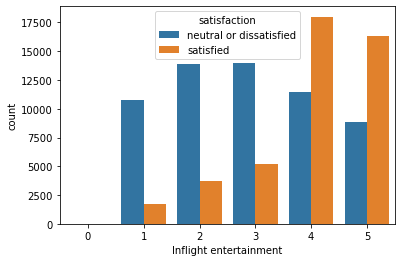

In [30]:
sns.countplot(x="Inflight entertainment", hue="satisfaction", data=train_1)

<AxesSubplot:xlabel='Seat comfort', ylabel='count'>

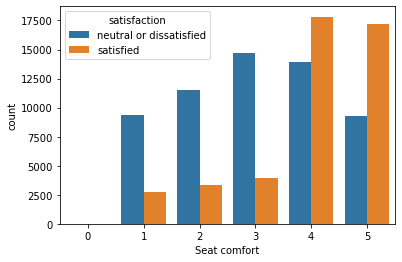

In [31]:
sns.countplot(x="Seat comfort", hue="satisfaction", data=train_1)

<AxesSubplot:xlabel='Leg room service', ylabel='count'>

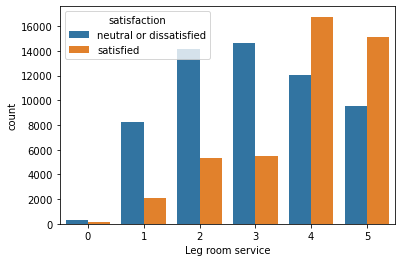

In [32]:
sns.countplot(x="Leg room service", hue="satisfaction", data=train_1)

In [33]:
train_1["satisfaction"][train_1["Arrival Delay in Minutes"]>1000]

6744                   satisfied
61310                  satisfied
83741    neutral or dissatisfied
Name: satisfaction, dtype: object

In [34]:
X = train_1.copy()
y = X.pop("satisfaction")

X["In Flight"] = (X["Inflight wifi service"] + X["Inflight entertainment"] + X["Seat comfort"] + X["Leg room service"] + X["Inflight service"] +
                 X["Cleanliness"] + X["Food and drink"]) / 7
X["Before Boarding"] = (X["Online boarding"] + X["On-board service"] + X["Ease of Online booking"] + X["Baggage handling"] + X["Checkin service"] +
                       X["Gate location"]) / 6
X["Arrival Delay in Minutes"].fillna(0, inplace=True)

for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()
discrete_features = X.dtypes == int
mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores

Online boarding                      0.210858
Inflight wifi service                0.161702
Class                                0.133508
In Flight                            0.130627
Before Boarding                      0.124340
Type of Travel                       0.113635
Inflight entertainment               0.093717
Flight Distance                      0.081411
Seat comfort                         0.078879
Leg room service                     0.060730
On-board service                     0.057203
Cleanliness                          0.051827
Ease of Online booking               0.050834
Age                                  0.046166
Baggage handling                     0.042633
Inflight service                     0.040982
Checkin service                      0.031930
Food and drink                       0.026221
Customer Type                        0.018590
Gate location                        0.012023
Arrival Delay in Minutes             0.007121
Departure Delay in Minutes        

In [35]:
one_hot_feats = ["Customer Type", "Type of Travel"]
ordinal_feats = ["Class"]
normalize_feats = ["Online boarding", "Inflight wifi service", "Inflight entertainment", "Flight Distance", "Seat comfort", "Leg room service", 
                   "On-board service", "Cleanliness", "Ease of Online booking", "Age", "Baggage handling", "Inflight service", "Checkin service", 
                   "Food and drink", "Gate location", "Departure/Arrival time convenient", "In Flight", "Before Boarding"]

In [36]:
X = train_1.copy()
y = X.pop("satisfaction")

X["In Flight"] = (X["Inflight wifi service"] + X["Inflight entertainment"] + X["Seat comfort"] + X["Leg room service"] + X["Inflight service"] +
                 X["Cleanliness"] + X["Food and drink"]) / 7
X["Before Boarding"] = (X["Online boarding"] + X["On-board service"] + X["Ease of Online booking"] + X["Baggage handling"] + X["Checkin service"] +
                       X["Gate location"]) / 6
X["Arrival Delay in Minutes"].fillna(0, inplace=True)

In [37]:
train_one_hot_feats = X[one_hot_feats]
train_ordinal_feats = X[ordinal_feats]
train_normalize_feats = X[normalize_feats]

In [38]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler

one_hot = OneHotEncoder(sparse=False)
train_one_hot_feats = one_hot.fit_transform(X[one_hot_feats])

ordinal = OrdinalEncoder(categories=[['Eco', 'Eco Plus', 'Business']])
train_ordinal_feats = ordinal.fit_transform(train_ordinal_feats)

normalize = MinMaxScaler()
train_normalize_feats = normalize.fit_transform(X[normalize_feats])

In [39]:
train_one_hot_feats

array([[1., 0., 0., 1.],
       [0., 1., 1., 0.],
       [1., 0., 1., 0.],
       ...,
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [1., 0., 1., 0.]])

In [40]:
train_ordinal_feats

array([[1.],
       [2.],
       [2.],
       ...,
       [2.],
       [0.],
       [2.]])

In [41]:
train_normalize_feats

array([[0.6       , 0.6       , 1.        , ..., 0.8       , 0.86206897,
        0.57692308],
       [0.6       , 0.6       , 0.2       , ..., 0.4       , 0.34482759,
        0.38461538],
       [1.        , 0.4       , 1.        , ..., 0.4       , 0.79310345,
        0.65384615],
       ...,
       [0.2       , 0.2       , 0.8       , ..., 0.2       , 0.65517241,
        0.5       ],
       [0.2       , 0.2       , 0.2       , ..., 0.2       , 0.27586207,
        0.5       ],
       [0.2       , 0.2       , 0.2       , ..., 0.6       , 0.10344828,
        0.46153846]])

In [42]:
train_data = np.concatenate((train_one_hot_feats, train_ordinal_feats, train_normalize_feats), axis=1)

In [43]:
train_data.shape

(103904, 23)

In [44]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
train_labels = label.fit_transform(y)

In [45]:
train_labels

array([0, 0, 1, ..., 0, 0, 0])

In [46]:
from sklearn.svm import LinearSVC

lin_svc = LinearSVC()

In [47]:
lin_svc.fit(train_data, train_labels)

LinearSVC()

In [48]:
from sklearn.metrics import accuracy_score
lin_pred = lin_svc.predict(train_data)
accuracy_score(train_labels, lin_pred)

0.8733061287342162

In [49]:
lin_pred

array([0, 0, 1, ..., 0, 0, 0])

In [50]:
from sklearn.model_selection import cross_val_score

cross_val_score(lin_svc, train_data, train_labels, cv=3, scoring='accuracy', verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   26.7s finished


array([0.87226794, 0.8706222 , 0.876653  ])

In [51]:
from sklearn.model_selection import cross_val_predict

lin_pred_1 = cross_val_predict(lin_svc, train_data, train_labels, cv=3, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   31.5s finished


In [52]:
from sklearn.metrics import confusion_matrix

confusion_matrix(train_labels, lin_pred_1)

array([[53213,  5666],
       [ 7511, 37514]])

In [53]:
from sklearn.metrics import precision_score, recall_score
precision_score(train_labels, lin_pred_1)

0.8687818434460398

In [54]:
recall_score(train_labels, lin_pred_1)

0.8331815657967796

In [55]:
from sklearn.metrics import f1_score
f1_score(train_labels, lin_pred_1)

0.8506093758857208

In [56]:
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier(random_state=42)

In [57]:
sgdc.fit(train_data, train_labels)

SGDClassifier(random_state=42)

In [58]:
sgdc_pred = sgdc.predict(train_data)
accuracy_score(train_labels, sgdc_pred)

0.8765302587003387

In [59]:
confusion_matrix(train_labels, sgdc_pred)

array([[54195,  4684],
       [ 8145, 36880]])

In [60]:
recall_score(train_labels, sgdc_pred)

0.8191004997223764

In [61]:
f1_score(train_labels, sgdc_pred)

0.8518403030408019

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

grad = GradientBoostingClassifier(
    n_estimators=500,
    learning_rate=0.8,
    random_state=42,
    max_depth=2
)

grad.fit(train_data, train_labels)

GradientBoostingClassifier(learning_rate=0.8, max_depth=2, n_estimators=500,
                           random_state=42)

In [63]:
grad_pred = grad.predict(train_data)
accuracy_score(train_labels, grad_pred)

0.9597320603634124

In [64]:
confusion_matrix(train_labels, grad_pred)

array([[57397,  1482],
       [ 2702, 42323]])

In [65]:
recall_score(train_labels, grad_pred)

0.939988895058301

In [66]:
f1_score(train_labels, grad_pred)

0.9528987954519869

In [67]:
test_1.pop(test_1.columns[0])

0            0
1            1
2            2
3            3
4            4
         ...  
25971    25971
25972    25972
25973    25973
25974    25974
25975    25975
Name: Unnamed: 0, Length: 25976, dtype: int64

In [68]:
test_1.pop(test_1.columns[0])

0        19556
1        90035
2        12360
3        77959
4        36875
         ...  
25971    78463
25972    71167
25973    37675
25974    90086
25975    34799
Name: id, Length: 25976, dtype: int64

In [69]:
X = test_1.copy()
y = X.pop("satisfaction")

X["In Flight"] = (X["Inflight wifi service"] + X["Inflight entertainment"] + X["Seat comfort"] + X["Leg room service"] + X["Inflight service"] +
                 X["Cleanliness"] + X["Food and drink"]) / 7
X["Before Boarding"] = (X["Online boarding"] + X["On-board service"] + X["Ease of Online booking"] + X["Baggage handling"] + X["Checkin service"] +
                       X["Gate location"]) / 6
X["Arrival Delay in Minutes"].fillna(0, inplace=True)

In [70]:
test_one_hot_feats = one_hot.fit_transform(X[one_hot_feats])

test_ordinal_feats = ordinal.fit_transform(X[ordinal_feats])

test_normalize_feats = normalize.fit_transform(X[normalize_feats])

In [71]:
test_data = np.concatenate((test_one_hot_feats, test_ordinal_feats, test_normalize_feats), axis=1)

In [72]:
test_data.shape

(25976, 23)

In [73]:
test_labels = label.fit_transform(y)

In [74]:
grad_pred_test = grad.predict(test_data)
accuracy_score(test_labels, grad_pred_test)

0.9295503541730828

In [75]:
confusion_matrix(test_labels, grad_pred_test)

array([[13339,  1234],
       [  596, 10807]])

In [76]:
recall_score(test_labels, grad_pred_test)

0.9477330527054284

In [77]:
f1_score(test_labels, grad_pred_test)

0.9219416481829039